# 산불 발생 데이터 분석 및 시각화
## 산불이 발생 했을 때의 수치형 데이터들의 분석

In [1]:
import pandas as pd
import numpy as np
%precision 3

'%.3f'

## 먼저 각각 분리되어있던 최종 학습 데이터셋 통합

In [2]:
df = pd.read_csv('wildfire_his.csv')
part_1 = pd.read_csv('final_training_data_2000_2003.csv')
part_2 = pd.read_csv('final_training_data_2004_2011.csv')
part_3 = pd.read_csv('2012-2014,학습데이터.csv')

In [3]:
# 양적 변수 Quantitative variable
part_1 = part_1[['일시','지점명','기온','강수량','풍속','풍향','습도','실효습도','label']]

In [4]:
part_2 = part_2[['tm','stnNm','ta','rn','ws','wd','hm','실효습도','label']]
part_2.columns = ['일시','지점명','기온','강수량','풍속','풍향','습도','실효습도','label']
part_2['일시'] = part_2['일시'].map(lambda x:f'{str(x)[0:4]}-{str(x)[4:6]}-{str(x)[6:8]} {str(x)[8:10]}:{str(x)[10:]}')
part_2

,일시,지점명,기온,강수량,풍속,풍향,습도,실효습도,label
0,2004-01-01 00:00,속초,4.9,NaN,6.3,230.0,39.0,28.25,0
1,2004-01-01 01:00,속초,4.9,NaN,4.8,250.0,36.0,27.70,0
2,2004-01-01 02:00,속초,4.2,NaN,3.0,250.0,35.0,28.77,0
3,2004-01-01 03:00,속초,3.3,NaN,2.4,270.0,40.0,30.13,0
4,2004-01-01 04:00,속초,4.1,NaN,2.8,270.0,36.0,29.13,0
...,...,...,...,...,...,...,...,...,...
5493089,2011-12-31 19:00,남해,3.7,NaN,1.3,270.0,46.0,36.68,0
5493090,2011-12-31 20:00,남해,1.6,NaN,0.5,270.0,54.0,42.43,0
5493091,2011-12-31 21:00,남해,0.8,NaN,0.7,250.0,57.0,44.30,0
5493092,2011-12-31 22:00,남해,0.6,NaN,0.7,230.0,60.0,43.01,0


In [5]:
combined_parts = pd.concat([part_1, part_2, part_3])
combined_parts

,일시,지점명,기온,강수량,풍속,풍향,습도,실효습도,label
0,2000-01-01 03:00,서울,-0.6,0.0,4.6,142.7,0.0,62.70,0
1,2000-01-01 03:00,서울,2.2,0.0,1.2,84.6,0.0,62.70,0
2,2000-01-01 03:00,서울,2.6,0.0,0.2,0.0,0.0,62.70,0
3,2000-01-01 03:00,서울,0.5,0.0,0.5,68.9,0.0,62.70,0
4,2000-01-01 03:00,서울,2.7,0.0,0.6,33.3,0.0,62.70,0
...,...,...,...,...,...,...,...,...,...
1967383,2014-06-19 19:00,남해,24.5,NaN,0.9,270.0,67.0,54.27,0
1967384,2014-06-19 20:00,남해,22.3,NaN,0.9,250.0,79.0,61.35,0
1967385,2014-06-19 21:00,남해,21.5,NaN,0.7,250.0,78.0,64.00,0
1967386,2014-06-19 22:00,남해,21.5,NaN,1.2,250.0,79.0,64.21,0


In [6]:
combined_parts.to_csv('training_data_final.csv')

In [2]:
combined_parts = pd.read_csv('training_data_final.csv')


## Two-Sample problem : 독립비교 t 검정(independent t-test)

1. Null Hypothesis : weather conditions don't affect wildfire occurence
2. Alternative Hypothesis : weather conditions affect wildfire occurence

- compared variables
    - temperature
    - amount of precipitation
    - wind speed
    - relative humidity
    - effective humidity
    
* ***wind direction is not quantitative variable***

In [3]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
plt.rcParams['font.family'] = 'NanumGothic'

### 기온 기술통계

In [4]:


# temperature
# delete blank row in dataframe
# decimal point set until 3
df_temperature = combined_parts.dropna(subset=['기온'])
df_des = df_temperature[['label','기온']]
df_des.describe()

,label,기온
count,2.043904e+07,2.043904e+07
mean,9.722569e-04,1.238964e+01
std,3.116587e-02,1.031035e+01
min,0.000000e+00,-3.270000e+01
25%,0.000000e+00,4.100000e+00
50%,0.000000e+00,1.320000e+01
75%,0.000000e+00,2.100000e+01
max,1.000000e+00,2.690000e+02


### boxplot(기온)

<AxesSubplot:xlabel='label', ylabel='기온'>

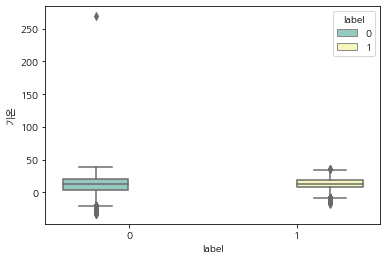

In [5]:
sns.boxplot(x='label', y='기온', hue='label', data = df_temperature, palette = 'Set3')


### 정규성 확인

- Shapiro-Wilk test와 Kolmogorov-Smirnov test
- 표본의 개수가 2000개 이상이므로, Kolmogorov-Smirnov test 진행

In [6]:
np.random.seed(12345678)
x = np.random.normal(0, 1, 1000)

In [7]:
ks_2samp(df_des[df_des['label']==0]['기온'], x)

KstestResult(statistic=0.7925461940911408, pvalue=0.0)

In [8]:
ks_2samp(df_des[df_des['label']==1]['기온'], x)

KstestResult(statistic=0.8919404186795491, pvalue=0.0)

- p-value가 유의수준에 도달하지 않기 때문에 해당 표본의 모집단은 정규성을 띄지 않는다
- 따라서 Mann-Whitny rank test 진행

In [9]:
u, p = stats.mannwhitneyu(df_temperature[df_temperature['label']==1]['기온'], df_temperature[df_temperature['label']==0]['기온'],alternative='two-sided')
u, p

(209663760536.500, 0.000)

***산불 발생 유무에 따른 기온의 중앙값에 대해 차이가 유의수준 .005 이하에서 유의하다***

### 강수량 기술통계

In [10]:
# amount of precipatation
df_rn = combined_parts.dropna(subset=['강수량'])
df_des=df_rn[['label','강수량']]
df_des.describe()

,label,강수량
count,1.361181e+07,1.361181e+07
mean,1.220485e-03,2.290901e-01
std,3.491411e-02,1.453348e+00
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00
max,1.000000e+00,1.055000e+02


### boxplot(강수량)

<AxesSubplot:xlabel='label', ylabel='강수량'>

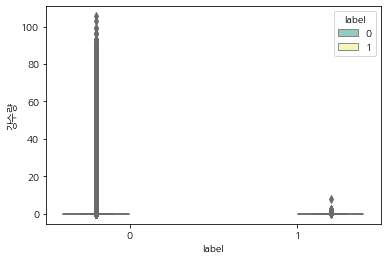

In [11]:
sns.boxplot(x='label', y='강수량', hue='label', data = df_rn, palette = 'Set3')

### 정규성 확인

In [12]:
ks_2samp(df_des[df_des['label']==0]['강수량'], x)

KstestResult(statistic=0.496, pvalue=9.301646788241219e-228)

In [13]:
ks_2samp(df_des[df_des['label']==1]['강수량'], x)

KstestResult(statistic=0.501953409980136, pvalue=2.36992581054463e-220)

- 정규성을 띄지 않아 Mann-Whitny rank test 진행

In [14]:
u, p = stats.mannwhitneyu(df_rn[df_rn['label']==1]['강수량'], df_rn[df_rn['label']==0]['강수량'],alternative='two-sided')
u, p

(103001897288.000, 0.000)

***산불 발생 유무에 따른 강수량의 중앙값에 대해 차이가 유의수준 .005 이하에서 유의하다***

## 풍속 기술통계

In [15]:
# wind speed
df_ws = combined_parts.dropna(subset=['풍속'])
df_des = df_ws[['label','풍속']]
df_des.describe()

,label,풍속
count,2.018848e+07,2.018848e+07
mean,9.735751e-04,2.043407e+00
std,3.118697e-02,1.970387e+00
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,6.000000e-01
50%,0.000000e+00,1.600000e+00
75%,0.000000e+00,2.900000e+00
max,1.000000e+00,6.010000e+01


<AxesSubplot:xlabel='label', ylabel='풍속'>

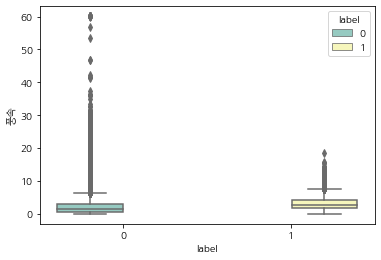

In [16]:
sns.boxplot(x='label', y='풍속', hue='label', data = df_ws, palette = 'Set3')

### 정규성 확인

In [17]:
ks_2samp(df_des[df_des['label']==0]['풍속'], x)

KstestResult(statistic=0.496, pvalue=9.301646788241219e-228)

In [18]:
ks_2samp(df_des[df_des['label']==1]['풍속'], x)

KstestResult(statistic=0.7430320529127449, pvalue=0.0)

- 정규성을 띄지 않아 Mann-Whitny rank test 진행

In [19]:
u, p = stats.mannwhitneyu(df_ws[df_ws['label']==1]['풍속'], df_ws[df_ws['label']==0]['풍속'],alternative='two-sided')
u, p

(268836138825.000, 0.000)

***산불 발생 유무에 따른 풍속의 중앙값에 대해 차이가 유의수준 .005 이하에서 유의하다***

## 상대습도 기술통계

In [20]:
# relative humidity
df_hm = combined_parts.dropna(subset=['습도'])
df_des = df_hm[['label','습도']]
df_des.describe()


,label,습도
count,1.847103e+07,1.847103e+07
mean,9.402834e-04,2.760722e+01
std,3.064962e-02,3.576528e+01
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,0.000000e+00,6.300000e+01
max,1.000000e+00,1.000000e+02


<AxesSubplot:xlabel='label', ylabel='습도'>

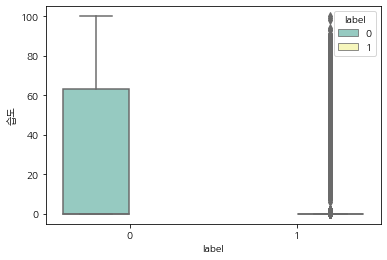

In [21]:
sns.boxplot(x='label', y='습도', hue='label', data = df_hm, palette = 'Set3')

### 정규성 확인

In [22]:
ks_2samp(df_des[df_des['label']==0]['습도'], x)

KstestResult(statistic=0.496, pvalue=9.301646788241219e-228)

In [23]:
ks_2samp(df_des[df_des['label']==1]['습도'], x)

KstestResult(statistic=0.496, pvalue=1.7343780549784067e-215)

- 정규성을 띄지 않아 Mann-Whitny rank test 진행

In [24]:
u, p = stats.mannwhitneyu(df_hm[df_hm['label']==1]['습도'], df_hm[df_hm['label']==0]['습도'],alternative='two-sided')
u, p

(116766975646.000, 0.000)

***산불 발생 유무에 따른 상대습도의 중앙값에 대해 차이가 유의수준 .005 이하에서 유의하다***

## 실효습도 기술통계

In [25]:
# effective humidity
df_efhm = combined_parts.dropna(subset=['실효습도'])
df_des = df_efhm[['label','실효습도']]
df_des


,label,실효습도
0,0,62.70
1,0,62.70
2,0,62.70
3,0,62.70
4,0,62.70
...,...,...
20484839,0,54.27
20484840,0,61.35
20484841,0,64.00
20484842,0,64.21


<AxesSubplot:xlabel='label', ylabel='실효습도'>

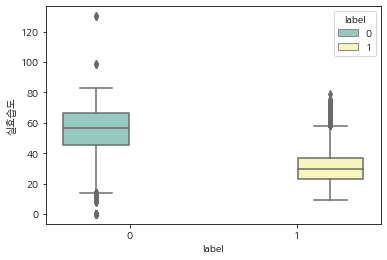

In [26]:
sns.boxplot(x='label', y='실효습도', hue='label', data = df_efhm, palette = 'Set3')

### 정규성 확인

In [27]:
ks_2samp(df_des[df_des['label']==0]['실효습도'], x)

KstestResult(statistic=0.9996990190544016, pvalue=0.0)

In [28]:
ks_2samp(df_des[df_des['label']==1]['실효습도'], x)

KstestResult(statistic=1.0, pvalue=0.0)

- 정규성을 띄지 않아 Mann-Whitny rank test 진행

In [29]:
u, p = stats.mannwhitneyu(df_efhm[df_efhm['label']==1]['실효습도'], df_efhm[df_efhm['label']==0]['실효습도'],alternative='two-sided')
u, p

(41824686750.000, 0.000)

***산불 발생 유무에 따른 풍속의 중앙값에 대해 차이가 유의수준 .005 이하에서 유의하다***

### Result
- 모든 수치형 데이터에 대해 산불이 발생한 사건의 기상 데이터와 발생하지 않은 사건 집단 사이에는 각 기상 수치들의 중앙값에 유의한 차이가 있다고 결론 내릴 수 있다.

In [6]:
from datetime import datetime, timedelta, date, time

In [11]:
# 봄, 겨울 추출
spr_win = []
for i in range(len(combined_parts)):
    row=list(combined_parts.iloc[i])
    if row[1][5:7] in ['12','01','02','03','04','05']:
        spr_win.append(row)

        
    
    

In [15]:
spr_win_df = pd.DataFrame(spr_win,columns=['ID','일시','지점명','기온','강수량','풍속','풍향','습도','실효습도','label'])

In [16]:
spr_win_df.to_csv('spr_win_training.csv')

In [17]:
df_temperature = spr_win_df.dropna(subset=['기온'])
df_des = df_temperature[['label','기온']]
df_des.describe()

,label,기온
count,1.047068e+07,1.047068e+07
mean,1.719373e-03,6.246243e+00
std,4.142967e-02,8.591570e+00
min,0.000000e+00,-3.270000e+01
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,5.600000e+00
75%,0.000000e+00,1.260000e+01
max,1.000000e+00,3.800000e+01


<AxesSubplot:xlabel='label', ylabel='기온'>

C:\Users\yujeyeong\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


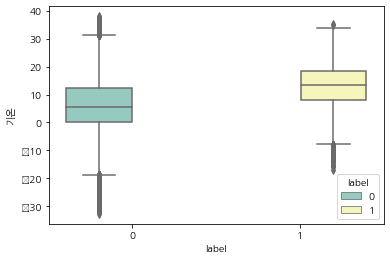

In [18]:
sns.boxplot(x='label', y='기온', hue='label', data = df_temperature, palette = 'Set3')

In [19]:
np.random.seed(12345678)
x = np.random.normal(0, 1, 1000)

In [21]:
ks_2samp(df_des[df_des['label']==0]['기온'], x)

KstestResult(statistic=0.6418931848239378, pvalue=0.0)

In [22]:
ks_2samp(df_des[df_des['label']==1]['기온'], x)

KstestResult(statistic=0.8867402655113037, pvalue=0.0)

In [23]:
u, p = stats.mannwhitneyu(df_temperature[df_temperature['label']==1]['기온'], df_temperature[df_temperature['label']==0]['기온'],alternative='two-sided')
p

0.000

In [24]:
# amount of precipatation
df_rn = spr_win_df.dropna(subset=['강수량'])
df_des=df_rn[['label','강수량']]
df_des.describe()

,label,강수량
count,6.839682e+06,6.839682e+06
mean,2.223495e-03,1.176273e-01
std,4.710150e-02,7.682706e-01
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00
max,1.000000e+00,8.100000e+01


<AxesSubplot:xlabel='label', ylabel='강수량'>

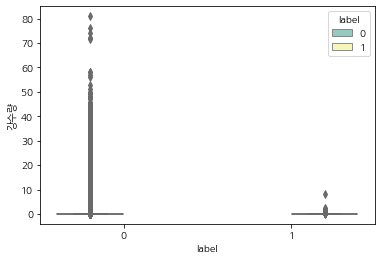

In [25]:
sns.boxplot(x='label', y='강수량', hue='label', data = df_rn, palette = 'Set3')

In [26]:
ks_2samp(df_des[df_des['label']==0]['강수량'], x)

KstestResult(statistic=0.496, pvalue=9.301646788241219e-228)

In [27]:
ks_2samp(df_des[df_des['label']==1]['강수량'], x)

KstestResult(statistic=0.502224618621778, pvalue=1.9361060941771408e-219)

In [28]:
u, p = stats.mannwhitneyu(df_rn[df_rn['label']==1]['강수량'], df_rn[df_rn['label']==0]['강수량'],alternative='two-sided')
p

0.000

In [29]:
# wind speed
df_ws = spr_win_df.dropna(subset=['풍속'])
df_des = df_ws[['label','풍속']]
df_des.describe()

,label,풍속
count,1.035333e+07,1.035333e+07
mean,1.719736e-03,2.260424e+00
std,4.143403e-02,2.109972e+00
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,7.000000e-01
50%,0.000000e+00,1.800000e+00
75%,0.000000e+00,3.300000e+00
max,1.000000e+00,6.010000e+01


<AxesSubplot:xlabel='label', ylabel='풍속'>

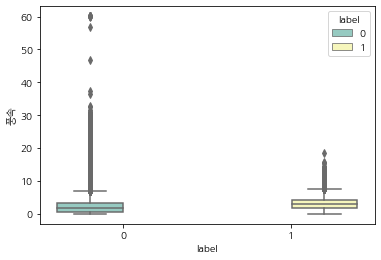

In [30]:
sns.boxplot(x='label', y='풍속', hue='label', data = df_ws, palette = 'Set3')

In [31]:
ks_2samp(df_des[df_des['label']==0]['풍속'], x)

KstestResult(statistic=0.5270789886032925, pvalue=1.7089152741941455e-259)

In [32]:
ks_2samp(df_des[df_des['label']==1]['풍속'], x)

KstestResult(statistic=0.7517351867452963, pvalue=0.0)

In [33]:
u, p = stats.mannwhitneyu(df_ws[df_ws['label']==1]['풍속'], df_ws[df_ws['label']==0]['풍속'],alternative='two-sided')
p

0.000

In [34]:
# relative humidity
df_hm = spr_win_df.dropna(subset=['습도'])
df_des = df_hm[['label','습도']]
df_des.describe()


,label,습도
count,9.523586e+06,9.523586e+06
mean,1.643079e-03,2.517843e+01
std,4.050159e-02,3.321364e+01
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,0.000000e+00,5.500000e+01
max,1.000000e+00,1.000000e+02


<AxesSubplot:xlabel='label', ylabel='습도'>

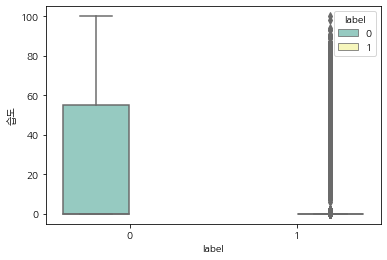

In [35]:
sns.boxplot(x='label', y='습도', hue='label', data = df_hm, palette = 'Set3')

In [36]:
ks_2samp(df_des[df_des['label']==0]['습도'], x)

KstestResult(statistic=0.496, pvalue=9.301646788241219e-228)

In [37]:
ks_2samp(df_des[df_des['label']==1]['습도'], x)

KstestResult(statistic=0.496, pvalue=4.004441827866908e-214)

In [38]:
u, p = stats.mannwhitneyu(df_hm[df_hm['label']==1]['습도'], df_hm[df_hm['label']==0]['습도'],alternative='two-sided')
p

0.000

In [41]:
# effective humidity
df_efhm = spr_win_df.dropna(subset=['실효습도'])
df_des = df_efhm[['label','실효습도']]
df_des.describe()

,label,실효습도
count,1.048458e+07,1.048458e+07
mean,1.720908e-03,5.019057e+01
std,4.144812e-02,1.402721e+01
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,4.009000e+01
50%,0.000000e+00,5.125000e+01
75%,0.000000e+00,6.099000e+01
max,1.000000e+00,1.302000e+02


<AxesSubplot:xlabel='label', ylabel='실효습도'>

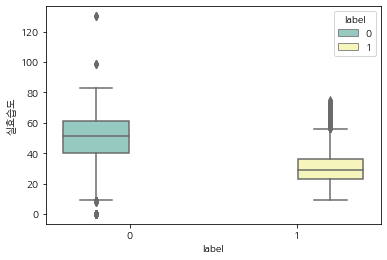

In [42]:
sns.boxplot(x='label', y='실효습도', hue='label', data = df_efhm, palette = 'Set3')

In [43]:
ks_2samp(df_des[df_des['label']==0]['실효습도'], x)

KstestResult(statistic=0.99966034617556, pvalue=0.0)

In [44]:
ks_2samp(df_des[df_des['label']==1]['실효습도'], x)

KstestResult(statistic=1.0, pvalue=0.0)

In [45]:
u, p = stats.mannwhitneyu(df_efhm[df_efhm['label']==1]['실효습도'], df_efhm[df_efhm['label']==0]['실효습도'],alternative='two-sided')
p

0.000